In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import numpy as np

In [ ]:
#Ruta
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos = os.listdir(ruta)
print(len(lista_archivos))

1050


# Otsu Funcion

In [ ]:
def Otsu(img):
  imagen = cv2.imread(img)
  imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  imagen_gris =cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  Histograma = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])

  th, imagenbn = cv2.threshold(imagen_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  return imagenbn

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn, mode='L')

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/Otsu/' + nombreArchivo
  mask_image.save(ruta)


In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_Otsu = Otsu(rutaImg)
  guardar(Mascara_Otsu, Archivo)

# Función rango Humbral

In [ ]:
def RangoUmbral(img):
  imagen = cv2.imread(img)
  imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  imagen_gris =cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

  Histograma = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])
  maximoH = max(Histograma)
  for i in range (0,len(Histograma)):
    if (Histograma [i] == maximoH) :
      indice = i
      break
  umbral_bajo, umbral_alto = indice  ,indice + 50
  imagenbn = cv2.inRange(imagen_gris, umbral_bajo,umbral_alto)

  return imagenbn

In [ ]:
def GuardarRango(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn, mode='L')

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/RangoUmbral/' +  nombreArchivo
  mask_image.save(ruta)


In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_Umbral = RangoUmbral(rutaImg)
  Guardar_img = GuardarRango(Mascara_Umbral,Archivo)

In [ ]:
ruta = '/content/drive/MyDrive/PROYECTO_GRADO/RangoUmbral'
lista_archivos = os.listdir(ruta)
print(len(lista_archivos))

741


# Histograma

In [ ]:
imagen = cv2.imread("AAHE.jpg")
imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
imagen_gris =cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

In [ ]:
Histograma = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])

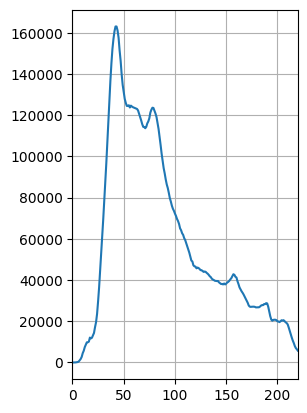

In [ ]:
plt.subplot(122)
plt.plot(Histograma)
plt.xlim(0,220)
plt.grid()

plt.show()

Grafica Histograma

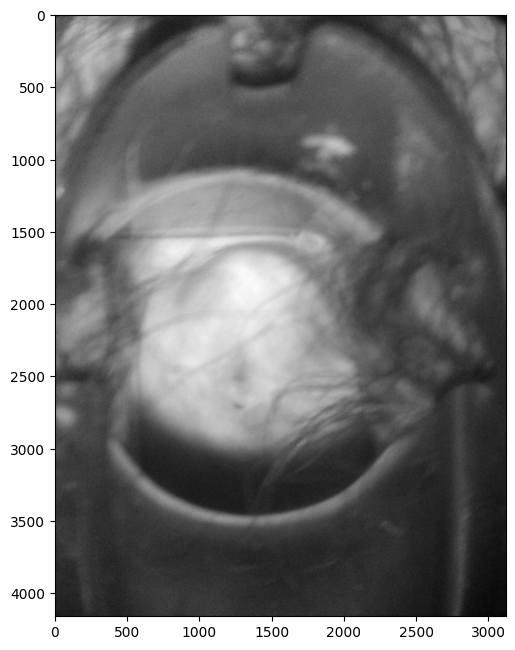

In [ ]:
plt.figure(figsize=(12.8,9.6))
plt.subplot(121)
plt.imshow(imagen_gris,'gray')

plt.show()

# Umbral manual

In [ ]:
umbral = 100
th, imagenbn = cv2.threshold(imagen_gris,umbral,255,cv2.THRESH_BINARY)

uint8
(4160, 3120)


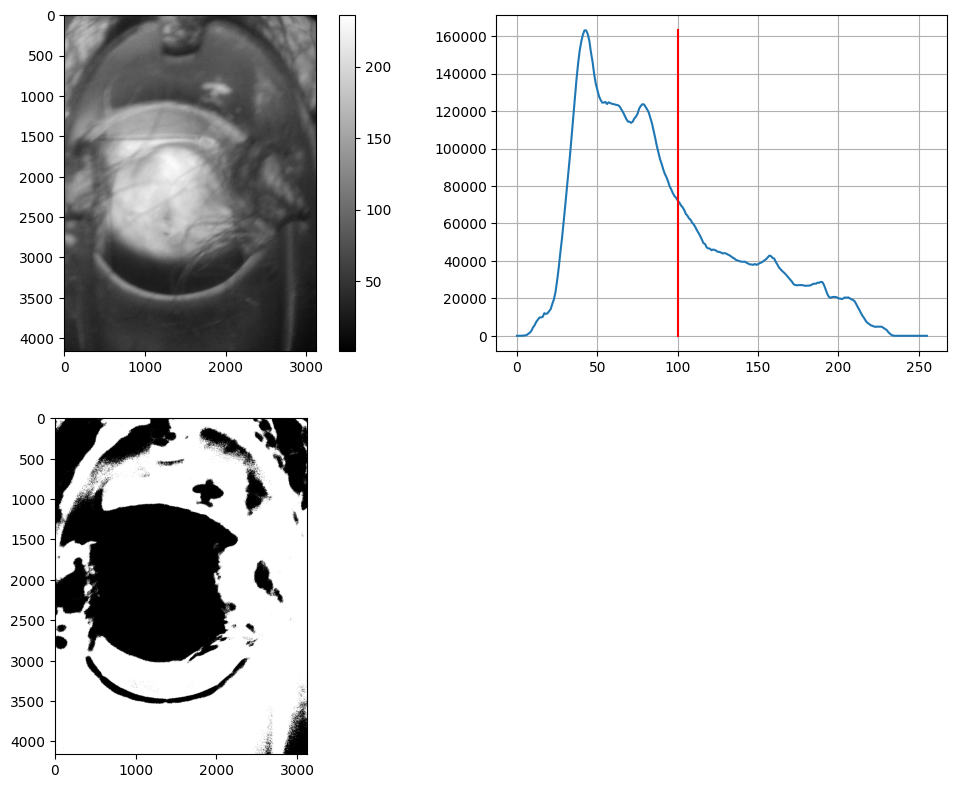

In [ ]:
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(imagen_gris,'gray')
plt.colorbar()

plt.subplot(222)
plt.plot(Histograma)
plt.plot([umbral,umbral],[0,max(Histograma)],'r')
plt.grid()
#por encima de la linea roja se hace blanco el cuello uterino y por debajo se hace negro

print(imagenbn.dtype)
print(imagenbn.shape)

plt.subplot(223)
plt.imshow(imagenbn,'gray')

plt.show()

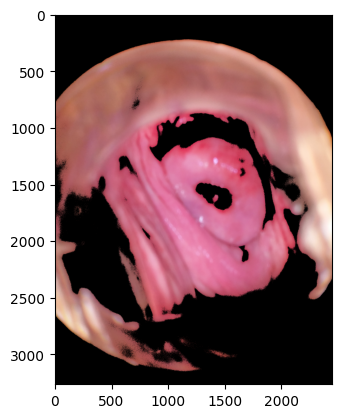

In [ ]:
mascara_rgb = imagen_rgb.copy()

for i in range (3):
  mascara_rgb[:,:,i] = cv2.bitwise_and(mascara_rgb[:,:,i],imagenbn)

plt.imshow(mascara_rgb)
plt.show()

# Umbral Otsu

In [ ]:
def otsu(imagen_gris, Histograma):
  th, imagenbn = cv2.threshold(imagen_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  print('umbral= ',th)
  plt.figure(figsize=(12.8,9.6))

  plt.subplot(221)
  plt.imshow(imagen_gris,'gray')
  plt.colorbar()

  plt.subplot(222)
  plt.plot(Histograma)
  plt.plot([th,th],[0,max(Histograma)],'r')
  plt.grid()
  #por encima de la linea roja se hace blanco el cuello uterino y por debajo se hace negro

  plt.subplot(223)
  plt.imshow(imagenbn,'gray')

  plt.show()

  return imagenbn
#muestra mitad de figuras en blanco y mitad de figuras en negro

In [ ]:
th, imagenbn = cv2.threshold(imagen_gris,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('umbral= ',th)

umbral=  108.0


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


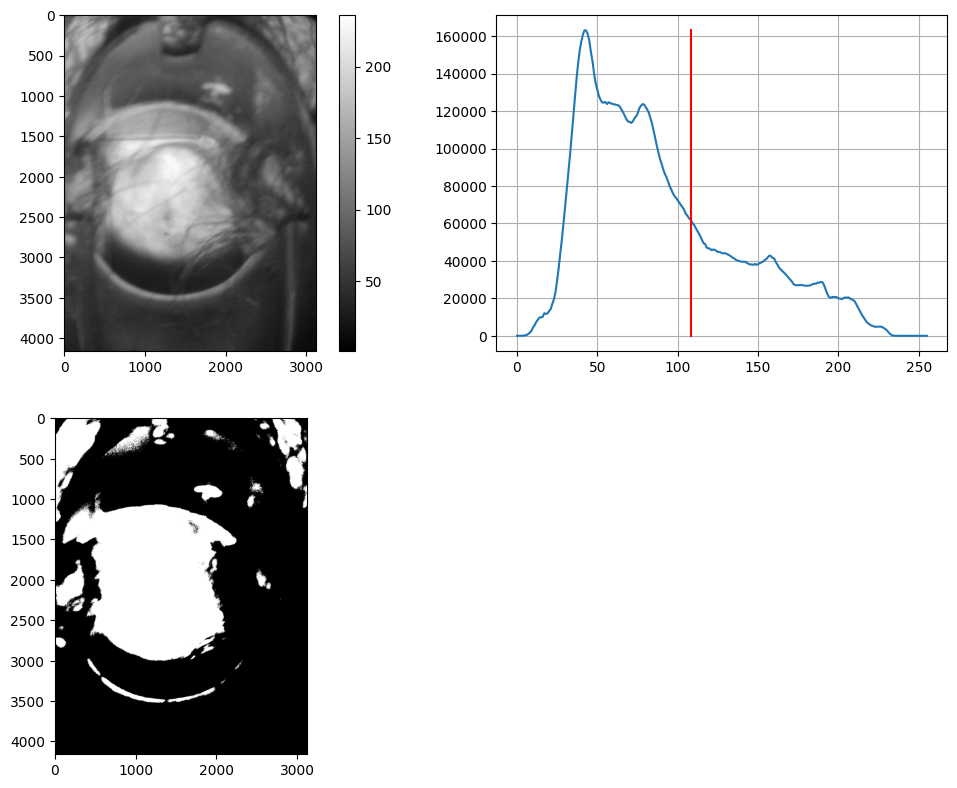

In [ ]:
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(imagen_gris,'gray')
plt.colorbar()

plt.subplot(222)
plt.plot(Histograma)
plt.plot([th,th],[0,max(Histograma)],'r')
plt.grid()
#por encima de la linea roja se hace blanco el cuello uterino y por debajo se hace negro

plt.subplot(223)
plt.imshow(imagenbn,'gray')

plt.show()

#muestra mitad de figuras en blanco y mitad de figuras en negro

In [ ]:
from google.colab import files
Nombre  = "Prediccion3.jp<g
cv2.imwrite(Nombre, imagenbn)
files.download(Nombre)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
mascara_rgb = imagen_rgb.copy()

for i in range (3):
  mascara_rgb[:,:,i] = cv2.bitwise_and(mascara_rgb[:,:,i],imagenbn)

plt.imshow(mascara_rgb)
plt.show()

# Segmentacion Rango Umbral

In [ ]:
Histograma = cv2.calcHist([imagen_gris],[0],None,[256],[0,256])
maximoH = max(Histograma)
for i in range (0,len(Histograma)):
  if (Histograma [i] == maximoH) :
    indice = i
    break

In [ ]:
umbral_bajo, umbral_alto = indice-50  ,indice + 50
imagenbn = cv2.inRange(imagen_gris, umbral_bajo,umbral_alto)

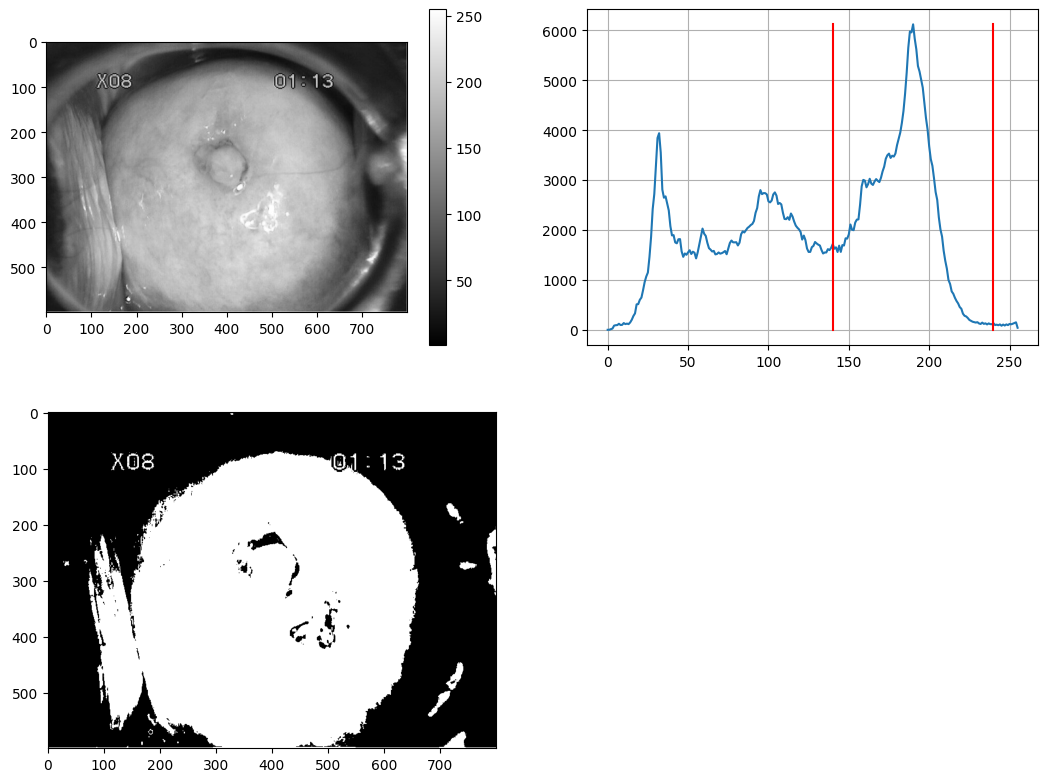

In [ ]:
plt.figure(figsize=(12.8,9.6))

plt.subplot(221)
plt.imshow(imagen_gris,'gray')
plt.colorbar()

plt.subplot(222)
plt.plot(Histograma)
plt.plot([umbral_bajo,umbral_bajo],[0,max(Histograma)],'r')
plt.plot([umbral_alto,umbral_alto],[0,max(Histograma)],'r')
plt.grid()
#por encima de la linea roja se hace blanco el cuello uterino y por debajo se hace negro

plt.subplot(223)
plt.imshow(imagenbn,'gray')

plt.show()

In [ ]:
from google.colab import files

cv2.imwrite("Prediccion3Rango.jpg", imagenbn)
files.download("Prediccion3Rango.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mascara

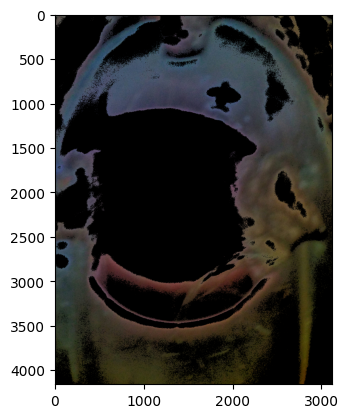

In [ ]:
mascara_rgb = imagen_rgb.copy()

for i in range (3):
  mascara_rgb[:,:,i] = cv2.bitwise_and(mascara_rgb[:,:,i],imagenbn)

plt.imshow(mascara_rgb)
plt.show()